In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
 
#importing dataset
df = pd.read_csv('/content/Global_PowerPlant_Database.csv')
df

,country_id,country_name,powerplant_name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel_id,primary_fuel,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1,Australia,Albany Wind Farm,AUS0000065,216.0,-350641,1177977,1,Wind,Australian Renewable Energy Mapping Infrastruc...,http://services.ga.gov.au/site_3/rest/services...,Australian Renewable Energy Mapping Infrastruc...,8.959530e+15,1.026430e+16,9.655560e+15,9.587280e+15,8.590030e+15
1,1,Australia,Appin (Mine),AUS0000264,556.0,-342082,1507722,2,Gas,Australian Renewable Energy Mapping Infrastruc...,http://services.ga.gov.au/site_3/rest/services...,Australian Renewable Energy Mapping Infrastruc...,2.048040e+16,2.382940e+16,1.635840e+15,1.589330e+16,6.453470e+15
2,1,Australia,Awaba,AUS0000049,11.0,-330250,1515497,3,Waste,Australian Renewable Energy Mapping Infrastruc...,http://services.ga.gov.au/site_3/rest/services...,Australian Renewable Energy Mapping Infrastruc...,7.655280e+15,8.338610e+15,9.172500e+04,8.830000e+02,8.085560e+15
3,1,Australia,Bairnsdale,AUS0000081,940.0,-378429,1475639,2,Gas,Australian Renewable Energy Mapping Infrastruc...,http://services.ga.gov.au/site_3/rest/services...,Australian Renewable Energy Mapping Infrastruc...,1.324570e+16,1.548860e+16,1.498210e+16,1.975410e+16,1.685240e+16
4,1,Australia,Ballarat Base Hospital,AUS0000113,30.0,-375596,1438469,2,Gas,Australian Renewable Energy Mapping Infrastruc...,http://services.ga.gov.au/site_3/rest/services...,Australian Renewable Energy Mapping Infrastruc...,4.194440e+15,4.213060e+15,5.079440e+15,6.831390e+15,6.663330e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,3,United States of America,Zion Energy Center,USA0055392,5967.0,424776,-878950,2,Gas,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,0.000000e+00,6.365600e+16,1.324340e+16,4.354940e+16,4.620630e+05
6813,3,United States of America,Zion Landfill Gas to Energy Facility,USA0056871,70.0,424803,-878861,3,Waste,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,4.359200e+04,4.913400e+04,4.669900e+04,4.248000e+16,3.866900e+16
6814,3,United States of America,Zorn,USA0001368,180.0,382803,-857023,2,Gas,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2.030000e+02,7.800000e+01,1.058000e+03,6.200000e+01,1.500000e+01
6815,3,United States of America,Zotos International WPGF,USA0057648,34.0,428869,-769683,1,Wind,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,3.671000e+16,2.460150e+05,2.489000e+03,1.670000e+02,1.233490e+05


cleaning data

In [49]:
print(df.shape)


(6817, 17)


In [50]:
 #Dropping the missing rows.
df_dropped = df.dropna(how = 'any')
#there is no null value in this dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_id           6817 non-null   int64  
 1   country_name         6817 non-null   object 
 2   powerplant_name      6817 non-null   object 
 3   gppd_idnr            6817 non-null   object 
 4   capacity_mw          6817 non-null   float64
 5   latitude             6817 non-null   int64  
 6   longitude            6817 non-null   int64  
 7   primary_fuel_id      6817 non-null   int64  
 8   primary_fuel         6817 non-null   object 
 9   source               6817 non-null   object 
 10  url                  6817 non-null   object 
 11  geolocation_source   6817 non-null   object 
 12  generation_gwh_2013  6817 non-null   float64
 13  generation_gwh_2014  6817 non-null   float64
 14  generation_gwh_2015  6817 non-null   float64
 15  generation_gwh_2016  6817 non-null   f

In [7]:
df.describe()

,country_id,capacity_mw,latitude,longitude,primary_fuel_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,6817.000000,6.817000e+03,6817.000000,6.817000e+03,6817.000000,6.817000e+03,6.817000e+03,6.817000e+03,6.817000e+03,6.817000e+03
mean,2.886460,1.784192e+15,363351.969781,-7.945646e+05,4.396362,4.176008e+15,4.333027e+15,4.236276e+15,4.185799e+15,4.253367e+15
std,0.399552,7.520842e+15,140160.924371,5.811068e+05,3.303483,1.135471e+16,1.159038e+16,1.153116e+16,1.153845e+16,1.158640e+16
min,1.000000,1.000000e+01,-428883.000000,-1.717124e+06,1.000000,-6.000000e+16,-5.900000e+16,-5.900000e+16,-5.900000e+16,-5.900000e+16
25%,3.000000,5.000000e+01,341452.000000,-1.105739e+06,2.000000,2.661000e+03,3.231000e+03,2.715000e+03,2.457000e+03,5.053000e+03
50%,3.000000,3.640000e+02,393740.000000,-9.017970e+05,4.000000,5.715800e+04,5.521900e+04,4.990200e+04,4.691800e+04,8.384200e+04
75%,3.000000,2.547000e+03,426260.000000,-7.711890e+05,6.000000,1.954706e+07,5.380267e+07,3.716222e+07,1.067795e+07,1.533488e+08
max,3.000000,7.900000e+16,712920.000000,1.531236e+06,14.000000,7.919980e+16,7.858000e+16,7.893890e+16,7.999000e+16,7.949500e+16


In [8]:
df1 = df.append(df.iloc[1:6817,:])
 
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6812     True
6813     True
6814     True
6815     True
6816     True
Length: 13633, dtype: bool

traning and testing data

In [9]:
# x and y values for test-train datas.
y = df.primary_fuel_id.values	
x = df[['capacity_mw','latitude','longitude','country_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

In [10]:
y

array([1, 2, 3, ..., 2, 1, 2])

In [11]:
x

,capacity_mw,latitude,longitude,country_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,216.0,-350641,1177977,1,8.959530e+15,1.026430e+16,9.655560e+15,9.587280e+15,8.590030e+15
1,556.0,-342082,1507722,1,2.048040e+16,2.382940e+16,1.635840e+15,1.589330e+16,6.453470e+15
2,11.0,-330250,1515497,1,7.655280e+15,8.338610e+15,9.172500e+04,8.830000e+02,8.085560e+15
3,940.0,-378429,1475639,1,1.324570e+16,1.548860e+16,1.498210e+16,1.975410e+16,1.685240e+16
4,30.0,-375596,1438469,1,4.194440e+15,4.213060e+15,5.079440e+15,6.831390e+15,6.663330e+15
...,...,...,...,...,...,...,...,...,...
6812,5967.0,424776,-878950,3,0.000000e+00,6.365600e+16,1.324340e+16,4.354940e+16,4.620630e+05
6813,70.0,424803,-878861,3,4.359200e+04,4.913400e+04,4.669900e+04,4.248000e+16,3.866900e+16
6814,180.0,382803,-857023,3,2.030000e+02,7.800000e+01,1.058000e+03,6.200000e+01,1.500000e+01
6815,34.0,428869,-769683,3,3.671000e+16,2.460150e+05,2.489000e+03,1.670000e+02,1.233490e+05


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
#test_size=0.2 means %20 test datas, %80 train datas
method_names = []
method_scores = []
print(x_train)
print(y_train)

       capacity_mw  latitude  longitude  country_id  generation_gwh_2013  \
6443  1.520000e+16    391992    -963086           3         0.000000e+00   
1620  4.000000e+01    335683   -1149181           3         5.403000e+16   
2820  1.720000e+02    421212   -1225479           3         5.696000e+03   
1643  1.375600e+04    360875   -1150507           3         6.544230e+05   
2877  1.656000e+03    327683    -994228           3         4.821470e+05   
...            ...       ...        ...         ...                  ...   
3772  1.100000e+01    407576   -1214145           3         4.893000e+03   
5191  2.490000e+02    262697    -978670           3         3.377000e+16   
5226  9.120000e+03    450038    -747994           3         6.672860e+15   
5390  2.000000e+01    372875    -800771           3         1.140000e+02   
860   2.020000e+02    358950   -1195108           3         4.216100e+04   

      generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
6443        -3.2

Random Forest Classification

random forest classification test Accuracy:  0.6774193548387096


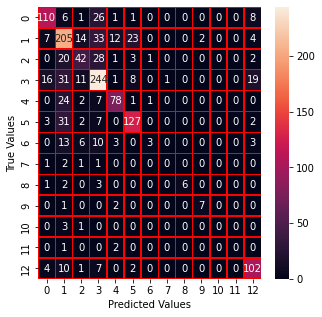

In [13]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier() 
RF.fit(x_train,y_train)
print("random forest classification test Accuracy: ",RF.score(x_test,y_test))
method_names.append("Random Forest Classification")
method_scores.append(RF.score(x_test,y_test))

#Confusion Matrix
y_pred = RF.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Decision Tree Classification

Decision Tree Classification test Accuracy:  0.5447214076246334


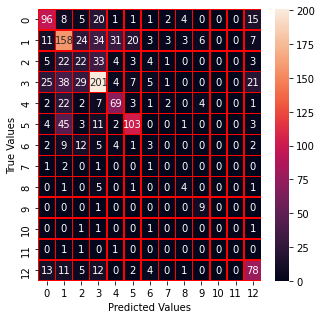

In [14]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification test Accuracy: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

hyposthesis testing

In [42]:

from scipy.stats import zscore, norm
#Calculating the z-score for the dataset
z_score = zscore(df.capacity_mw)

#Calculating the p-value
p_value = norm.sf(abs(z_score))

#Printing the results
print ("The z-score is :", z_score)
print ("The p-value is :", p_value)

The z-score is : 0      -0.23725
1      -0.23725
2      -0.23725
3      -0.23725
4      -0.23725
         ...   
6812   -0.23725
6813   -0.23725
6814   -0.23725
6815   -0.23725
6816   -0.23725
Name: capacity_mw, Length: 6817, dtype: float64
The p-value is : [0.40623127 0.40623127 0.40623127 ... 0.40623127 0.40623127 0.40623127]


data visualization

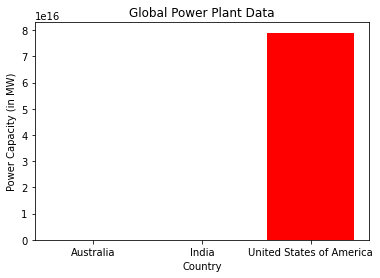

In [30]:
import matplotlib.pyplot as plt 

# Input Data 
country = df.country_name
power_capacity = df.capacity_mw 

# Plotting a bar graph 
plt.bar(country, power_capacity, color ='red') 

# Naming the x-axis 
plt.xlabel('Country') 
# Naming the y-axis 
plt.ylabel('Power Capacity (in MW)') 
# Graph Title 
plt.title('Global Power Plant Data') 

# Show the plot 
plt.show()

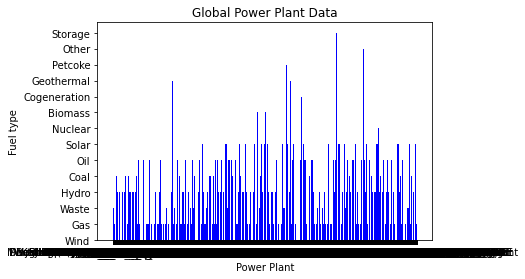

In [36]:
import matplotlib.pyplot as plt 

# Input Data 
powerplant = df.powerplant_name
fuel = df.primary_fuel

# Plotting a bar graph 
plt.bar(powerplant, fuel, color ='blue') 

# Naming the x-axis 
plt.xlabel('Power Plant') 
# Naming the y-axis 
plt.ylabel('Fuel type') 
# Graph Title 
plt.title('Global Power Plant Data') 

# Show the plot 
plt.show()

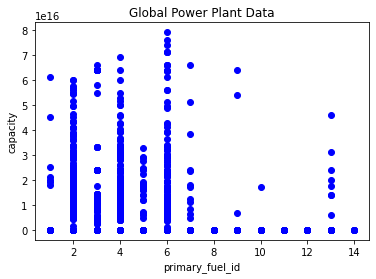

In [48]:
import matplotlib.pyplot as plt 

# Input Data 
powerplant = df.primary_fuel_id
fuel = df.capacity_mw
# Plotting a bar graph 
plt.scatter(powerplant, fuel, color ='blue') 

# Naming the x-axis 
plt.xlabel('primary_fuel_id') 
# Naming the y-axis 
plt.ylabel('capacity') 
# Graph Title 
plt.title('Global Power Plant Data') 

# Show the plot 
plt.show()